# 1. Įvadas  

#### 1.1. Tikslai

Tyrimo tikslas – išanalizuoti turimus iš Japonijos kilusios animacijos stiliaus – Anime duomenis.

Tyrimo uždaviniai:
1.	Nustatyti, kokių Anime tipų yra daugiausia.
2.	Išanalizuoti Anime tipus pagal reitingus ir reitingavusių narių skaičių.
3.	Išsiaiškinti populiariausius Anime kūrinius.
4.	Išanalizuoti Anime tipų žanrus ir atlikti gilesnę populiariausio žanro analizę.
5.	Atlikti dviejų populiariausių Anime tipų analizę, atsižvelgiant į pasirinktus žanrus.

Hipotezė : atsižvelgiant į animacijos kiekį, reitingą ir balsavusiųjų skaičių, populiariausi yra TV komedijos žanro Anime.

#### 1.2. Duomenų šaltinis

Duomenys buvo panaudoti iš interneto svetainės data.world - https://data.world/annisasugest/animenew

# 2. Duomenų apdorojimas

#### 2.1. Reikalingi moduliai

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from skimage import data
from matplotlib import rcParams

#### 2.2. Duomenų importavimas

In [2]:
df = pd.read_csv("anime.csv", index_col=0)
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12294 entries, 32281 to 26081
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12294 non-null  object 
 1   genre     12232 non-null  object 
 2   type      12269 non-null  object 
 3   episodes  12294 non-null  object 
 4   rating    12064 non-null  float64
 5   members   12294 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 672.3+ KB


In [4]:
df.describe( include = "all" ) 

,name,genre,type,episodes,rating,members
count,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,12292,3264,6,187,NaN,NaN
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1,NaN,NaN
freq,2,823,3787,5677,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


#### 2.3. Duomenų filtravimas

In [8]:
df = df[df["rating"]>=6]
df = df[df["members"]>=1000]

df

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...
2434,Kijoku: Princess Double Kari,Hentai,OVA,3,6.00,1368
24327,Oyome-sama Honey Days♥,Hentai,OVA,2,6.00,1403
2540,Tonari no Oneesan,"Comedy, Hentai",OVA,2,6.00,1756


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6174 entries, 32281 to 4541
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      6174 non-null   object 
 1   genre     6172 non-null   object 
 2   type      6174 non-null   object 
 3   episodes  6174 non-null   object 
 4   rating    6174 non-null   float64
 5   members   6174 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 337.6+ KB


In [10]:
df[df['genre'].isna()].head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
33589,ViVid Strike!,NaN,TV,12,6.96,12345


In [193]:
df = df.dropna(how='any')
final_data = df.drop_duplicates()
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 32281 to 4541
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      6172 non-null   object 
 1   genre     6172 non-null   object 
 2   type      6172 non-null   object 
 3   episodes  6172 non-null   object 
 4   rating    6172 non-null   float64
 5   members   6172 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 337.5+ KB


# 3. Duomenų analizė

#### 3.1. Apskaičiuojame kiekvienos anime rūšies kiekį.

In [194]:
final_data.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


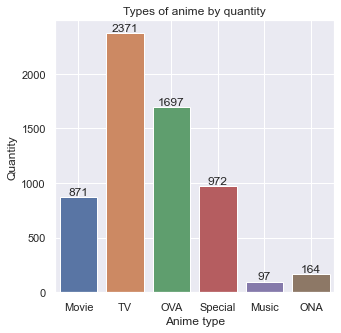

In [195]:
ax = sns.countplot(data=final_data, x ='type')
ax.bar_label(ax.containers[0])
ax.set_title('Types of anime by quantity')
ax.set(xlabel='Anime type', ylabel='Quantity')
plt.grid(True)
plt.show()

Pagal diagramą matome, kad didžiausias pasirinkimas yra TV ir OVA (angl. Original video animation) anime.

#### 3.2. Apskaičiuojame reitingų vidurkį ir vidutinį balsavusių narių skaičių pagal anime tipus.

In [14]:
final_data.groupby('type')[['rating','members']].mean().round(2)


,rating,members
type,,
Movie,7.35,26921.32
Music,6.82,5397.31
ONA,6.81,14913.10
OVA,6.87,10813.47
Special,7.01,12800.73
TV,7.28,66972.03


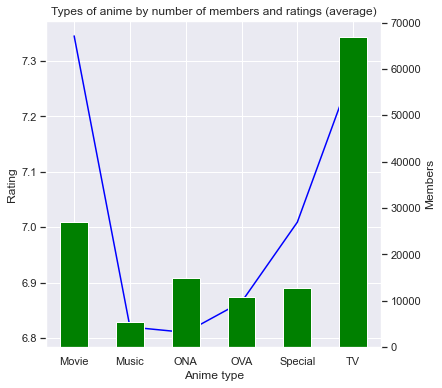

In [61]:
fig, ax = plt.subplots(figsize=(6,6))
p1 = final_data.groupby('type').mean()['rating'].plot(ax=ax, color = 'blue')
ax2=ax.twinx()
p2 = final_data.groupby('type').mean()['members'].plot( kind = "bar", color = 'green')
ax.set_ylabel('Rating') 
ax2.set_ylabel('Members') 
ax.set_xlabel('Anime type')
ax.set_title('Types of anime by number of members and ratings (average)')
plt.grid(False)
plt.show()

Nustatyta, kad pagal reitingų vidurkį ir vidutinį balsavusių narių skaičių populiariausi yra Movie ir TV Anime.

#### 3.3. Apskaičiuojame reitingų vidurkį ir vidutinį balsavusių narių skaičių pagal anime tipus.

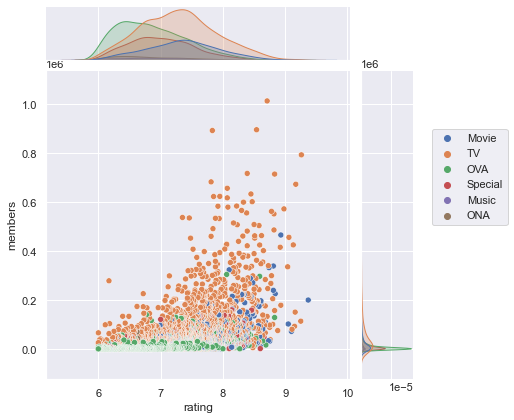

In [58]:
ax = sns.jointplot(data=final_data, x="rating", y="members",hue = "type" )
ax.ax_joint.legend_._visible=False
ax.fig.legend(bbox_to_anchor=(1, 0.7), loc=2)
plt.grid(True)
plt.show()

Išfiltruojame dešimt didžiausią reitingą turinčių anime neatsižvelgiant į anime tipą.

In [18]:
top_10_rating = final_data.nlargest(n=10, columns=['rating'], keep = "all")
top_10_rating

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


Išfiltruojame dešimt didžiausią narių kiekį turinčių anime neatsižvelgiant į anime tipą.

In [19]:
top_10_members = final_data.nlargest(n=10, columns=['members'], keep = "all")
top_10_members

,name,genre,type,episodes,rating,members
anime_id,,,,,,
1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190


Patikriname, ar yra sutampančių anime pagal didžiausią reitingą ir narių skaičių.

In [20]:
top_10_combined = top_10_rating.assign(result=top_10_rating['name'].isin(top_10_members['name']))
top_10_combined[top_10_combined['result'] == True]

,name,genre,type,episodes,rating,members,result
anime_id,,,,,,,
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True


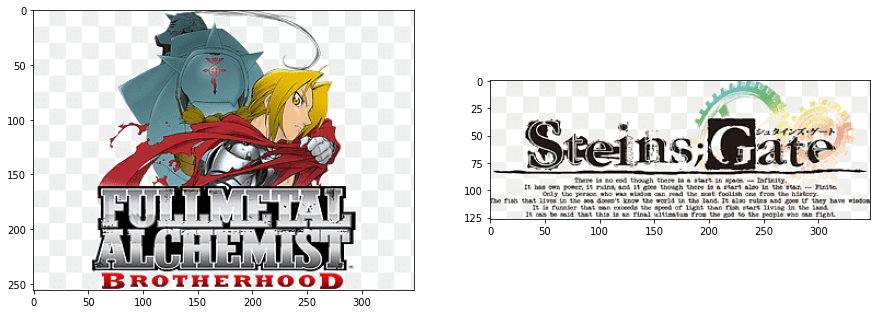

In [21]:
myImage_1 = Image.open("Brotherhood.png")
myImage_2 = Image.open("png.png")

rcParams['figure.figsize'] = 15 ,10
plt.rcParams["axes.grid"] = False
fig, ax = plt.subplots(1,2)
ax[0].imshow(myImage_1)
ax[1].imshow(myImage_2)
plt.show()

Analizė pagal žanrus

In [22]:
genre_count = final_data ['genre'].value_counts().nlargest(n=15, keep = "all")
genre_count=pd.DataFrame(genre_count)
genre_count = genre_count.reset_index()
genre_count

,index,genre
0,Hentai,507
1,Comedy,136
2,Music,69
3,"Comedy, Slice of Life",58
4,"Comedy, School, Slice of Life",55
5,"Adventure, Comedy, Mystery, Police, Shounen",32
6,"Action, Mecha, Sci-Fi",31
7,"Action, Adventure, Comedy, Shounen",30
8,"Comedy, Parody",29
9,"Adventure, Mecha, Sci-Fi, Shounen",26


Analizė pagal gautas kategorijas neįmanoma, kadangi kartojasi tos pačios žanrų rūšys. Todėl yra susikuriamos naujos žanrų kategorijos.

Naujos žanrų kategorijos

In [23]:
def genre_identification (str):
    result_text = ''
    if "Comedy" in str:
        result_text += "Comedy "
    if "Fantasy" in str:
        result_text += "Fantasy "
    if "Adventure" in str:
        result_text += "Adventure "
    return (result_text)
        

final_data["filtered_genre"]= final_data["genre"].map(genre_identification)
final_data


,name,genre,type,episodes,rating,members,filtered_genre
anime_id,,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy
...,...,...,...,...,...,...,...
2434,Kijoku: Princess Double Kari,Hentai,OVA,3,6.00,1368,
24327,Oyome-sama Honey Days♥,Hentai,OVA,2,6.00,1403,
2540,Tonari no Oneesan,"Comedy, Hentai",OVA,2,6.00,1756,Comedy


In [24]:
final_data["filtered_genre"].astype(str)
final_data["filtered_genre"] = final_data["filtered_genre"].replace('',"Not suitable")
final_data.head()  


,name,genre,type,episodes,rating,members,filtered_genre
anime_id,,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Not suitable
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Not suitable
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy


In [25]:
final_data['filtered_genre'].value_counts()

Not suitable                 2357
Comedy                       1794
Adventure                     430
Fantasy                       422
Comedy Fantasy Adventure      308
Comedy Adventure              307
Fantasy Adventure             297
Comedy Fantasy                257
Name: filtered_genre, dtype: int64

In [26]:
fd_genre = final_data[final_data ['filtered_genre'] != "Not suitable"]
fd_genre = fd_genre.reset_index()
fd_genre.head()


,anime_id,name,genre,type,episodes,rating,members,filtered_genre
0,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
2,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy
3,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,Comedy
4,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,Adventure


Apskaičiuojame kiekvienos kategorijos kiekius.

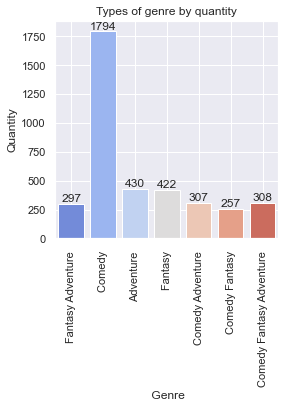

In [28]:
ax = sns.countplot(data=fd_genre, x ='filtered_genre', palette="coolwarm")
ax.bar_label(ax.containers[0])
ax.set_title('Types of genre by quantity')
ax.set(xlabel=' Genre', ylabel='Quantity')
plt.xticks(rotation=90)
plt.grid(True)
sns.set(rc={'figure.figsize':(3,3)})
plt.show()

Rating ir members

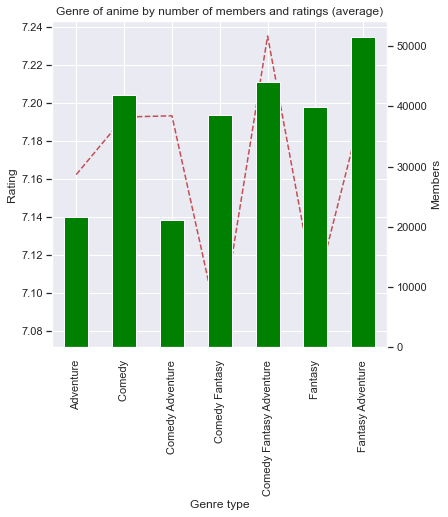

In [60]:
fig, ax = plt.subplots(figsize=(6,6))
p1 = fd_genre.groupby('filtered_genre').mean()['rating'].plot(ax=ax, c="r", ls = '--')
ax2=ax.twinx()
p2 = fd_genre.groupby('filtered_genre').mean()['members'].plot( kind = "bar", color = 'green')
ax.set_ylabel('Rating') 
ax2.set_ylabel('Members') 
ax.set_xlabel('Genre type')
ax.set_title('Genre of anime by number of members and ratings (average)')
ax.tick_params(axis='x', rotation=90)
plt.grid(False)
plt.show()


Nustatome priklausomybę tarp reitingų dydžio ir narių balsavimo kiekio.

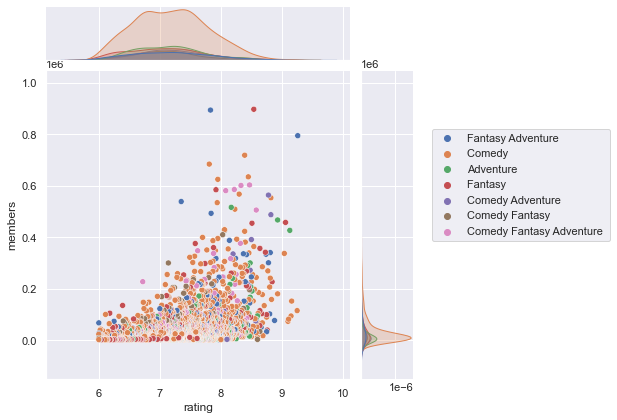

In [62]:
ax = sns.jointplot(data=fd_genre, x="rating", y="members",hue = "filtered_genre" )
ax.ax_joint.legend_._visible=False
ax.fig.legend(bbox_to_anchor=(1, 0.7), loc=2)
plt.grid(True)
plt.show()


!!!!!Pagal duomenis galima nustatyti, kad didėjnat reitingams, didėja ir reitingavusių narių skaičius. 
Dažniausiai suteikiamas reitingas buvo tarp 6,8 ir 7,5, o aktyviausios grupes yra kai balsuotojų skaicius iki 20 000.

Didžiausio žanro Comedy analizė 

In [31]:
comedy_genre = fd_genre[fd_genre["filtered_genre"] == "Comedy "]
comedy_genre.head()

,anime_id,name,genre,type,episodes,rating,members,filtered_genre
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
2,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy
3,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,Comedy
5,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,Comedy
6,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,Comedy


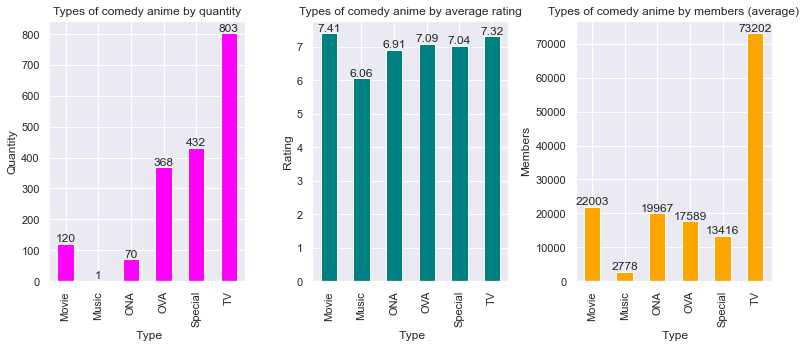

In [36]:
plt.subplot(1,3,1)

ax1 = comedy_genre.groupby('type').count()['anime_id'].plot (kind = "bar", color = 'magenta', figsize =(11,5))
ax1.bar_label(ax1.containers[0])
ax1.set_title('Types of comedy anime by quantity')
ax1.set(xlabel=' Type', ylabel='Quantity')

plt.subplot(1,3,2)
ax2 = comedy_genre.groupby('type').mean()['rating'].round(2).plot (kind = "bar", color = 'teal',figsize =(11,5) )
ax2.bar_label(ax2.containers[0])
ax2.set_title('Types of comedy anime by average rating')
ax2.set(xlabel=' Type', ylabel='Rating')

plt.subplot(1,3,3)
ax3 = comedy_genre.groupby('type').mean()['members'].round(0).plot (kind = "bar", color = 'orange', figsize =(11,5))
ax3.bar_label(ax3.containers[0])
ax3.set_title('Types of comedy anime by members (average)')
ax3.set(xlabel=' Type', ylabel='Members')

plt.tight_layout()


Išfiltruojame 5 anime, kurių reitingas ir balsavusių narių skaičius didžiausi.

In [37]:
fd_genre[fd_genre["filtered_genre"] == "Comedy "][['members','rating']].head(5)


,members,rating
1,114262,9.25
2,151266,9.16
3,93351,9.15
5,72534,9.10
6,81109,9.11


Nustatome, du anime pavadinimus, kurių reitingas ir balsavusių narių skaičius didžiausi.

In [38]:
fd_genre.iloc[1:3]


,anime_id,name,genre,type,episodes,rating,members,filtered_genre
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
2,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy


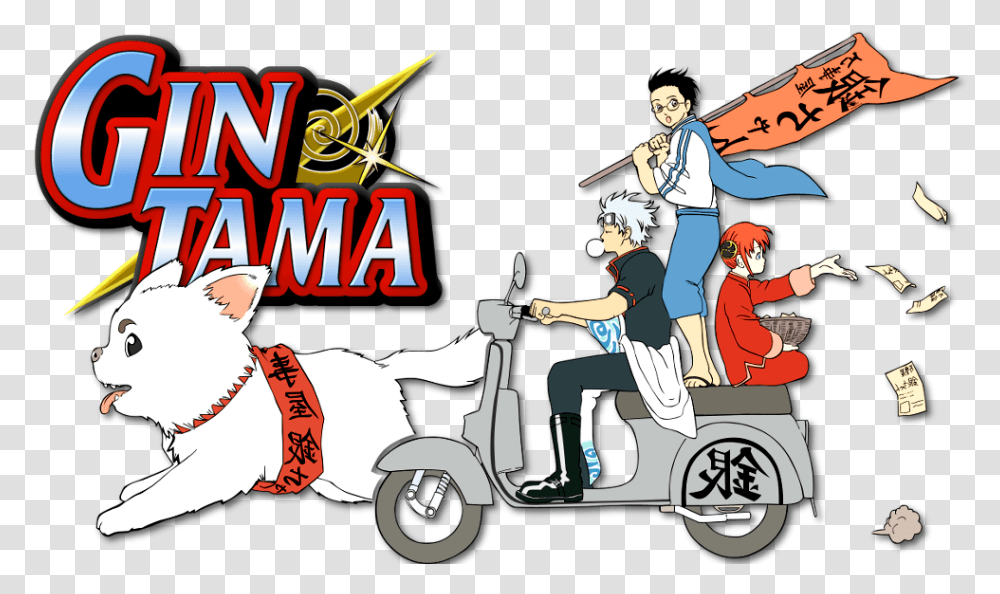

In [39]:
myImage_3 = Image.open("gintama.png")
myImage_3

Anime tipų - TV ir OVA - analizė pagal pasirinktus žanrus

TV tipo anime rodiklių apskaičiavimas

In [174]:
TV_data = fd_genre[fd_genre['type'] == "TV"]
TV_data.head()

,anime_id,name,genre,type,episodes,rating,members,filtered_genre
0,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
2,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy
3,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,Comedy
4,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,Adventure


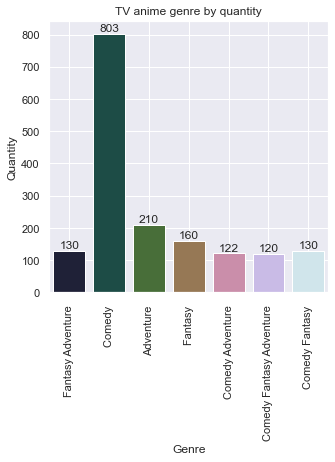

In [175]:
ax = sns.countplot(data=TV_data, x ='filtered_genre', palette="cubehelix")
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=90)
ax.set_title('TV anime genre by quantity')
ax.set(xlabel='Genre', ylabel='Quantity')
sns.set(rc={'figure.figsize':(5,5)})
plt.grid(True)
plt.show()

Analizė pagal epizodų skaičių

In [176]:
TV_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 3733
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        1675 non-null   int64  
 1   name            1675 non-null   object 
 2   genre           1675 non-null   object 
 3   type            1675 non-null   object 
 4   episodes        1675 non-null   object 
 5   rating          1675 non-null   float64
 6   members         1675 non-null   int64  
 7   filtered_genre  1675 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 117.8+ KB


In [177]:
TV_data[TV_data["episodes"] == "Unknown"].count()


anime_id          20
name              20
genre             20
type              20
episodes          20
rating            20
members           20
filtered_genre    20
dtype: int64

In [189]:
TV_data_clean = TV_data.set_index("episodes")
TV_data_clean.head()


,anime_id,name,genre,type,rating,members,filtered_genre
episodes,,,,,,,
64,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26,793665,Fantasy Adventure
51,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.25,114262,Comedy
51,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.16,151266,Comedy
10,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,9.15,93351,Comedy
148,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,9.13,425855,Adventure


In [190]:
# data_with_index = data_with_index.drop("Ireland")

TV_data_clean = TV_data_clean.drop("Unknown")
TV_data_clean = TV_data_clean.reset_index()
TV_data_clean["episodes"].astype(int)
TV_data_clean.head()

,episodes,anime_id,name,genre,type,rating,members,filtered_genre
0,64,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26,793665,Fantasy Adventure
1,51,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.25,114262,Comedy
2,51,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.16,151266,Comedy
3,10,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,9.15,93351,Comedy
4,148,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,9.13,425855,Adventure


In [191]:
TV_data_clean.nlargest(n=10, columns=['episodes'], keep = "all")

TypeError: Column 'episodes' has dtype object, cannot use method 'nlargest' with this dtype